In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score



In [23]:
df_hmeq = pd.read_csv("../data/HMEQ.csv",engine = 'python')
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [24]:
df_hmeq['JOB'].fillna("Other",inplace = True)
df_hmeq.fillna(df_hmeq.mean(),inplace = True)


In [25]:
df_hmeq_dummy = pd.get_dummies(df_hmeq)
df_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [26]:
np.random.seed(1234)
msk = np.random.ranfrom sklearn.metrics import f1_score

import matplotlib as pl d(df_hmeq_dummy.shape[0]) < 0.7
df_hmeq_train = df_hmeq_dummy[msk]
df_hmeq_test = df_hmeq_dummy[~msk]

df_hmeq_train_y= df_hmeq_train["BAD"]
df_hmeq_train_x = df_hmeq_train.drop("BAD",axis = 1, inplace = False)
df_hmeq_test_y = df_hmeq_test["BAD"]
df_hmeq_test_x = df_hmeq_test.drop("BAD",axis = 1, inplace = False)

print("train data X size : {}".format(df_hmeq_train_x.shape))
print("train data Y size : {}".format(df_hmeq_train_x.shape))
print("test data X size : {}".format(df_hmeq_test_x.shape))
print("test data Y size : {}".format(df_hmeq_test_y.shape))

train data X size : (2604, 18)
train data Y size : (2604, 18)
test data X size : (1144, 18)
test data Y size : (1144,)


In [27]:
df_hmeq_train_x_scaled = scale(df_hmeq_train_x,axis = 0)
df_hmeq_test_x_scaled = scale(df_hmeq_test_x,axis = 0)

pd.DataFrame(df_hmeq_train_x_scaled,columns = df_hmeq_train_x.columns).head()

# 분석모델 리스트
model = ["DecisionTree","RandomForest","GradientBoosting","SVM"]

# 정확도 저장 리스트
train_accuracy = []
test_accuracy = []
#f1 score 저장 리스트
model_f1_score = []

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [28]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)

print("Accurary on training set:{:.3f}".format(tree_uncustomized.score(df_hmeq_train_x_scaled,df_hmeq_train_y)))
print("Accurary on test set:{:.3f}".format(tree_uncustomized.score(df_hmeq_test_x_scaled,df_hmeq_test_y)))

Accurary on training set:1.000
Accurary on test set:0.912


In [29]:
train_accuracy.append(tree_uncustomized.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
test_accuracy.append(tree_uncustomized.score(df_hmeq_test_x_scaled,df_hmeq_test_y))
model_f1_score.append(f1_score(df_hmeq_test_y,tree_uncustomized.predict(df_hmeq_test_x_scaled)))

In [30]:
rf = RandomForestClassifier(criterion="gini",n_estimators=500,max_depth=4,min_samples_leaf=30,random_state=1234)
rf.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)
train_accuracy.append(rf.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
test_accuracy.append(rf.score(df_hmeq_test_x_scaled,df_hmeq_test_y))
model_f1_score.append(f1_score(df_hmeq_test_y,rf.predict(df_hmeq_test_x_scaled)))

In [31]:
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,min_samples_leaf=30,n_estimators=5,random_state=1234)
gb.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)
train_accuracy.append(gb.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
test_accuracy.append(gb.score(df_hmeq_test_x_scaled,df_hmeq_test_y))
model_f1_score.append(f1_score(df_hmeq_test_y,gb.predict(df_hmeq_test_x_scaled)))

In [32]:
df_hmeq_test_yKNeighborsClassifiersvm = SVC(C=6,gamma = 0.1, random_state=1234)
svm.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)
train_accuracy.append(svm.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
test_accuracy.append(svm.score(df_hmeq_test_x_scaled,df_hmeq_test_y))
model_f1_score.append(f1_score(df_hmeq_test_y,svm.predict(df_hmeq_test_x_scaled)))

In [35]:
df_eval = pd.DataFrame(index= model_f1_score)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score
0.547085,1.000,0.912,0.547
0.297521,0.925,0.926,0.298
0.239316,0.922,0.922,0.239
0.691824,0.981,0.957,0.692


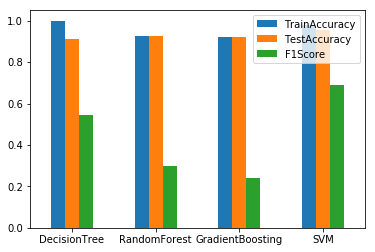

In [34]:
df_eval.plot.bar(rot=0)